In [211]:
import matplotlib.pyplot as plt
import numpy as np

In [1]:
noOfData = 100
m1= [[0,5]]
m2= [[5,0]] #Mean

# m1 = [[2.5,2.5]]
# m2 = [[10.0,10.0]]

C= [[2,1],[1,2]] # covariance

A= np.linalg.cholesky(C)
print(A)

U1 = np.random.randn(noOfData, 2)
X1 = U1 @ A.T + m1

U2 = np.random.randn(noOfData, 2)
X2 = U2 @ A.T + m2

fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(-5,10)
ax.set_ylim(-5, 10)
ax.scatter(X1[:,0], X1[:,1])
ax.scatter(X2[:,0], X2[:,1])
ax.set_xlabel("Iterations", fontsize=12)
ax.set_ylabel("Classification Accuracy(%)", fontsize=12)
ax.set_title("Gaussian Density Scatter Plot")
plt.savefig('scatterplot.png')

NameError: name 'np' is not defined

In [223]:
X = np.concatenate((X1, X2), axis=0)

In [224]:
pos = np.ones(noOfData)
neg = -1.0 * np.ones(noOfData)
Y = np.concatenate((pos, neg))

In [225]:
rIndex = np.random.permutation(2*noOfData)
Xr = X[rIndex,]
Yr = Y[rIndex]
# Training and test sets (half half) #
X_train = Xr[0:noOfData]
Y_train = Yr[0:noOfData]
X_test = Xr[noOfData:2*noOfData]
Y_test = Yr[noOfData:2*noOfData]
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
Ntrain = noOfData;
Ntest = noOfData;

(100, 2) (100,) (100, 2) (100,)


In [226]:
def PercentCorrect(Inputs, targets, weights):
    N = len(targets)
    nCorrect = 0
    for n in range(N):
        OneInput = Inputs[n,:]
        if (targets[n] * np.dot(OneInput, weights) > 0):
            nCorrect +=1
    return 100*nCorrect/N

In [239]:
# Perceptron learning loop #
# Random initialization of weights #
w = np.random.randn(2)
print(w)
# What is the performance with the initial random weights? #
print('Initial Percentage Correct: %6.2f' %(PercentCorrect(X_train, Y_train, w)))
# Fixed number of iterations (think of better stopping criterion) #
MaxIter=1000
# Learning rate (change this to see convergence changing) #
alpha = 0.010
# Space to save answers for plotting #
P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)
# Main Loop #
for itr in range(MaxIter):
    # Select a data item at random #
    r = np.floor(np.random.rand()*Ntrain).astype(int)
    x = X_train[r,:]

    #If it is misclassified, update weights
    if(Y_train[r] * np.dot(x,w) < 0 ):
        w +=alpha * Y_train[r] *x

#Evaluate trainings and test performance for plotting 
    P_train[itr] = PercentCorrect(X_train, Y_train, w)
    P_test[itr] = PercentCorrect(X_test, Y_test, w)
print('Percentage Correct After Training: %6.2f %6.2f'
%(PercentCorrect(X_train, Y_train, w), PercentCorrect(X_test, Y_test, w)))

[1.00035466 2.46411501]
Initial Percentage Correct:  53.00
Percentage Correct After Training: 100.00 100.00


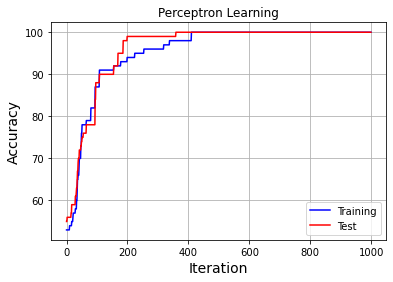

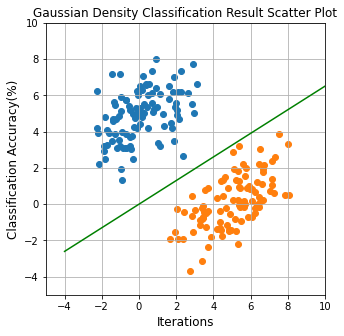

In [240]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(MaxIter), P_train, 'b', label = "Training")
ax.plot(range(MaxIter), P_test, 'r', label = "Test")
ax.grid(True)
ax.legend()
ax.set_title('Perceptron Learning')
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_xlabel('Iteration', fontsize=14)
plt.savefig('learningCurves.png')

fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(-5,10)
ax.set_ylim(-5, 10)
ax.grid(True)
ax.scatter(X1[:,0], X1[:,1])
ax.scatter(X2[:,0], X2[:,1])
x=np.linspace(-4,10)
plt.plot(x, -w[0]*x/w[1],c="g") # Plot the separating line #x*a0+y*a1=0
ax.plot(m1, m2)
ax.set_xlabel("Iterations", fontsize=12)
ax.set_ylabel("Classification Accuracy(%)", fontsize=12)
ax.set_title("Gaussian Density Classification Result Scatter Plot")

plt.savefig('ClassificationResult.png')

In [219]:
# Scikitlearn can do it for us #
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
model = Perceptron()
model.fit(X_train, Y_train)
yh_train = model.predict(X_train)
print("Accuracy on training set: %6.2f" %(accuracy_score(yh_train, Y_train)))
yh_test = model.predict(X_test)
print("Accuracy on test set: %6.2f" %(accuracy_score(yh_test, Y_test)))
if (accuracy_score(yh_test, Y_test) > 0.99):
    print("Wow, Perfect Classification on Separable dataset!")
    


Accuracy on training set:   1.00
Accuracy on test set:   1.00
Wow, Perfect Classification on Separable dataset!
